# Summer Analytics 2023
# WEEK-2 Graded Assignment: Linear Regression

## Introduction

In this exercise, you will implement linear regression and get to see it work on data. Before starting on this programming exercise, we strongly recommend watching the video lectures and work out ungraded assisgnment ,completing the review questions for the associated topics.

All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook.

Before we begin with the exercises, we need to import all libraries required for this programming exercise. Throughout the course, we will be using [`numpy`](http://www.numpy.org/) for all arrays and matrix operations, and [`matplotlib`](https://matplotlib.org/) for plotting.

In [ ]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

Iris species of a flower is one of the most popular datasets for machine learning. This dataset is primarily for classification, but here we will use same dataset with some changes so that we can use it for Linear Regression. Let's load the dataset first.

In [ ]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()

It includes three iris species named as 'setosa' , 'versicolor', 'virginica' with  some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id,
Sepal Length Cm,
Sepal Width Cm,,
Petal Length Cm,
Petal Width Cm,
Species. Let's see some of the first rows of the datasets after loading it from sklearn.

In [ ]:
iris_data =pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data["target"]=iris.target
iris_data.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
iris_data.shape #part of EDA

(150, 5)

In [ ]:
iris_data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

We can now rename column name to make it more standard for ease of coding and readability.

In [ ]:
iris_data.rename(columns={'sepal length (cm)':'sepal_length',
                          'sepal width (cm)':'sepal_width',
                          'petal length (cm)':'petal_length',
                          'petal width (cm)':'petal_width'},inplace = True)

In [ ]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Add a new column named "species" having value {if target == 0 : 'setosa' ,
if target ==1 : 'versicolor',
if target == 2 : 'virginica' }

In [ ]:
iris_data['target']#iris_data.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [ ]:
iris_data.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [ ]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
tar_new = []
def delta_tar(data):
   for i in range(len(data)):
      if data[i] == 0:
         tar_new.append('setosa')
      elif data[i] == 1:
         tar_new.append('versicolor')
      else:
         tar_new.append('virginica')
   return tar_new

iris_data =pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data["target"]=iris.target
iris_data.rename(columns={'sepal length (cm)':'sepal_length',
                          'sepal width (cm)':'sepal_width',
                          'petal length (cm)':'petal_length',
                          'petal width (cm)':'petal_width'},inplace = True)


iris_data.insert(5,"species",delta_tar(iris_data['target']),True)
iris_data.head()






,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


we will now select "versicolor" to predict its "petal_width" using "petal_length " as one of the parameter.So your next task is to make a new DataFrame named "data" having only rows whose species values are 'versicolor'.


In [ ]:
data = iris_data[iris_data.species == 'versicolor']
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [ ]:
data.shape

(50, 6)

Now we are droping  all the columns except petal_length and petal_width

In [ ]:
data.drop(columns=['target','species','sepal_length','sepal_width'],axis = 1,inplace=True)
data.head()

<ipython-input-212-161949601375>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['target','species','sepal_length','sepal_width'],axis = 1,inplace=True)


,petal_length,petal_width
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5


In [ ]:
data.head()

,petal_length,petal_width
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5


Now write code to print the shape of DataFrame named as data.

In [ ]:
data.shape

(50, 2)

Now  plot the Dataframe named data having x axis as 'petal_length', y axis as 'petal_width' and kind='scatter'

<Axes: xlabel='petal_length', ylabel='petal_width'>

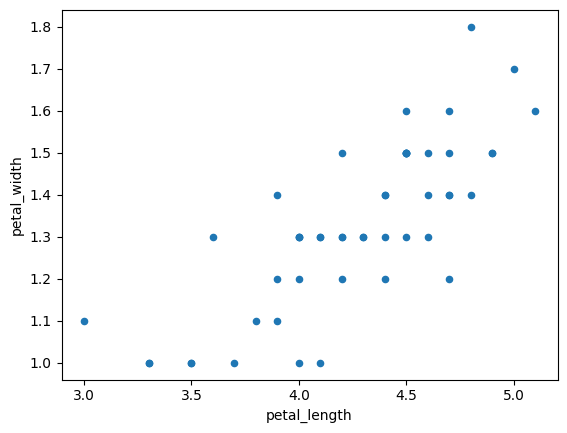

In [ ]:
data.plot.scatter(x = 'petal_length', y = 'petal_width')

<Axes: xlabel='petal_length', ylabel='petal_width'>

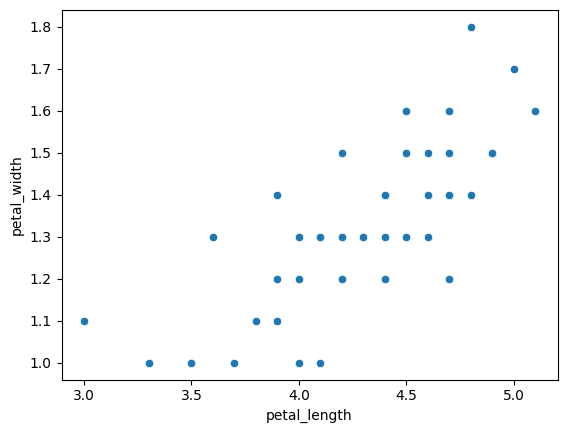

In [ ]:
import seaborn as sns
sns.scatterplot(x = 'petal_length', y = 'petal_width', data = data)
#Here the scatterplot is plotted using seaborn

<function matplotlib.pyplot.show(close=None, block=None)>

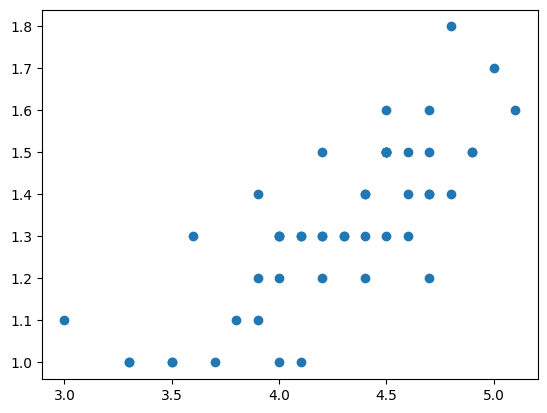

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data.petal_length, data.petal_width)
plt.show
#scatterplot using matplotlib

Now let's start with Linear Regression

We will now split the dataset into training and test datasets into (X_train,Y_train) and (X_test,Y_test)

In [ ]:
from sklearn.model_selection import train_test_split
X=data['petal_length'].values.reshape(-1,1)
Y=data['petal_width'].values.reshape(-1,1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.33,random_state=1)

Now let's plot the training  datasets of  kind scatter with x axis as X_train and y axis as Y_train.

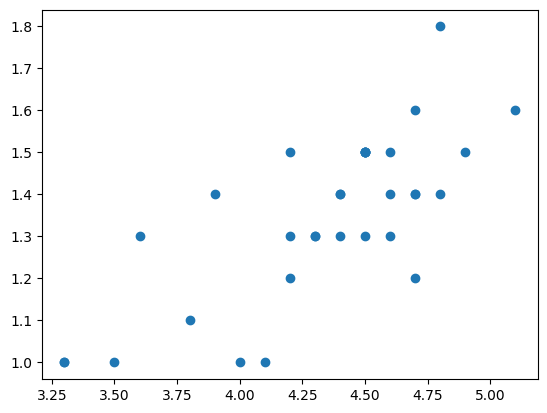

In [ ]:
plt.scatter(X_train, Y_train)
plt.show()

Now let's plot the test datasets of kind scatter with x axis as X_test and y axis as Y_test

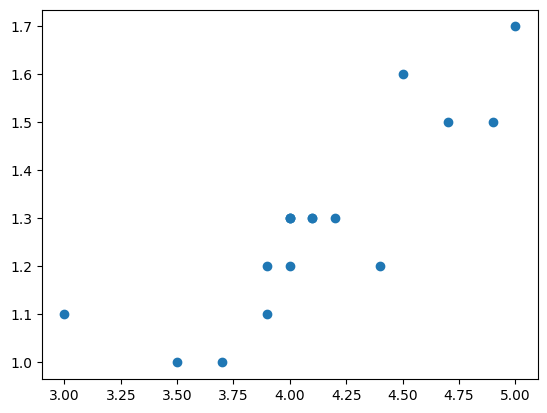

In [ ]:
plt.scatter(X_test,Y_test)
plt.show()

Here I have converted the 2D arrays of X_train and Y_train into 1D array just to make things look easier. The plots can be plotted without doing so i.e even without converting them. I have done this way just to explore things.

In [ ]:
X_new = X_train.flatten()

In [ ]:
Y_new = Y_train.flatten()
#flatten function coverts 2D array to 1D array

I have done this conversion only for training datasets and for test datasets I haven't done the conversions. The X_test and Y_test are as it is i.e they are in the 2D array forms.

In [ ]:
dictionary = {'X_Train':X_new,
              'Y_Train':Y_new}
df = pd.DataFrame(dictionary)
df.head()

,X_Train,Y_Train
0,4.8,1.4
1,4.9,1.5
2,4.7,1.4
3,4.6,1.4
4,4.1,1.0


Now write the code for LinearRegession using sklearn.

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(df[['X_Train']],df.Y_Train)

LinearRegression()

Now print the Intercept and Coefficient.

In [ ]:
regr.coef_

array([0.3338594])

In [ ]:
regr.intercept_

-0.10228120516499262

Now we can overlay the predicted line and test data points to see where the predicted point lies.

In [ ]:
df.head()

,X_Train,Y_Train
0,4.8,1.4
1,4.9,1.5
2,4.7,1.4
3,4.6,1.4
4,4.1,1.0


In [ ]:
df.astype(float)

,X_Train,Y_Train
0,4.8,1.4
1,4.9,1.5
2,4.7,1.4
3,4.6,1.4
4,4.1,1.0
5,4.2,1.2
6,4.3,1.3
7,4.7,1.2
8,4.6,1.5
9,5.1,1.6


In [ ]:
df.dtypes

X_Train    float64
Y_Train    float64
dtype: object

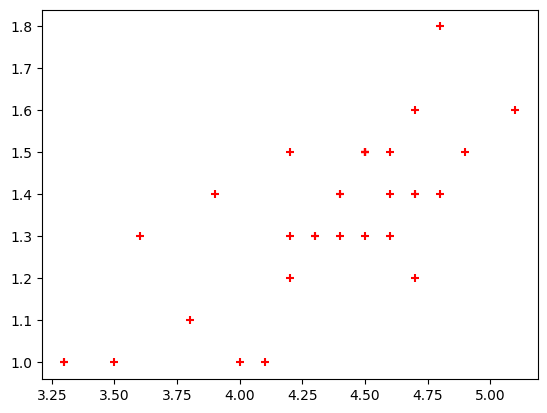

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df.X_Train, df.Y_Train, color = 'red', marker = '+')
plt.show()


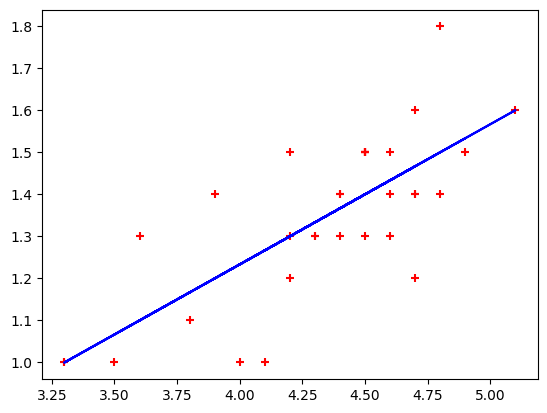

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel = 'sepal_len_train'
plt.ylabel = 'sepal_wid_train'
plt.scatter(df.X_Train, df.Y_Train, color = 'red', marker = '+')
plt.plot(df.X_Train,regr.predict(df[['X_Train']]), color = 'blue')
plt.show()

Let's plot the above line on test data and check how it is fitting

In [ ]:
lst2 = list(zip(X_test,Y_test))
lst2 #the zip function returns tuple

[(array([5.]), array([1.7])),
 (array([4.5]), array([1.6])),
 (array([4.4]), array([1.2])),
 (array([4.1]), array([1.3])),
 (array([4.9]), array([1.5])),
 (array([4.]), array([1.3])),
 (array([3.]), array([1.1])),
 (array([3.5]), array([1.])),
 (array([4.2]), array([1.3])),
 (array([3.7]), array([1.])),
 (array([3.9]), array([1.2])),
 (array([4.]), array([1.3])),
 (array([4.]), array([1.3])),
 (array([4.7]), array([1.5])),
 (array([3.9]), array([1.1])),
 (array([4.]), array([1.2])),
 (array([4.1]), array([1.3]))]

In [ ]:
df2 = pd.DataFrame(lst2, columns = ['X_Test','Y_Test'])
df2.head()

,X_Test,Y_Test
0,[5.0],[1.7]
1,[4.5],[1.6]
2,[4.4],[1.2]
3,[4.1],[1.3]
4,[4.9],[1.5]


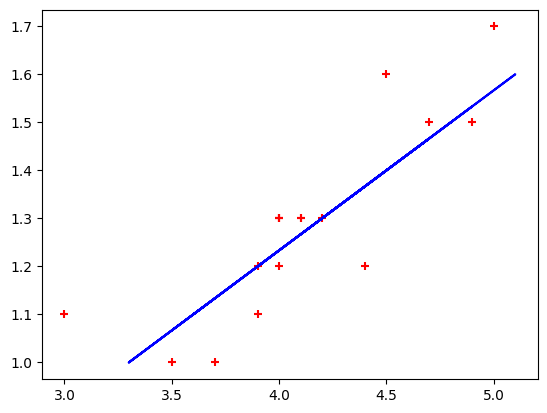

In [ ]:
%matplotlib inline
plt.xlabel = 'sepal_len_test'
plt.ylabel = 'sepal_wid_test'

plt.scatter(df2.X_Test, df2.Y_Test, color = 'red', marker = '+')
plt.plot(df.X_Train,regr.predict(df[['X_Train']]), color = 'blue')

The above plot shows us how the Linear Regression model fits into the test data, we can see here that it coincides with 2 test points and is very close to few of them.

This is end of assisgnment , but for futhur reading you can search articles on
Lasso Regression, Multivariate Regression , ElasticNet regression, Ridge Regression, Stepwise Regression.